<a href="https://colab.research.google.com/github/paishowstopper/TSAI/blob/main/EVA5/Session_11/Session_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.optim.lr_scheduler import OneCycleLR

Uploaded files to colab before execution (Uploaded in "framework" folder in github)

In [2]:
from model import BasicBlock, ResNetModified
from datatransform import DataTransformation
from dataloader import Loader
from train import Train
from test import Test
import helper
# Reference: https://github.com/davidtvs/pytorch-lr-finder
from lr_finder import LRFinder

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
transform = DataTransformation()
#Different transforms for training and testing in this assignment
trainTransform = transform.AlbumentationTrainTransform()
testTransform = transform.AlbumentationTestTransform()

loader = Loader(trainTransform, testTransform, 512, 4)
#Going with the default variable values set in the data loader
trainloader, testloader, classes = loader.CIFAR10Load()

Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


 frog   dog   dog   cat


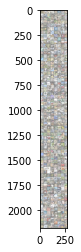

In [5]:
# Show random training images (default 4)
helper.DisplayImages(trainloader, classes)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


horse   dog   car plane


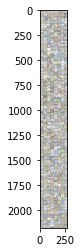

In [6]:
# Show random testing images (default 4)
helper.DisplayImages(testloader, classes)

In [7]:
model = ResNetModified(BasicBlock, [2, 2, 2, 2]).to(device)
model = torch.nn.DataParallel(model)
cudnn.benchmark = True

In [8]:
#Display model summary
helper.DisplayModelSummary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [9]:
epochs = 24
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.54E-02


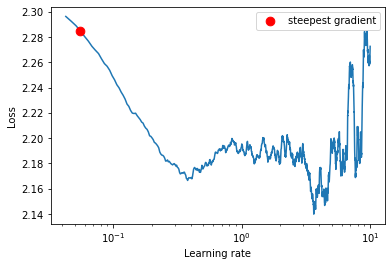

In [13]:
optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9, weight_decay=1e-4)
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, start_lr=1e-4, end_lr=10, num_iter=len(trainloader)*epochs, step_mode='linear')
lr_finder.plot()
lr_finder.reset()

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.05, epochs=epochs, steps_per_epoch=len(trainloader), pct_start=5/epochs, 
                       anneal_strategy='linear', div_factor=10.0, final_div_factor=1.0)

In [11]:
#Training
Train(trainloader, model, criterion, optimizer, scheduler, device, epochs).train()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[1,    98] loss: 213.176
Accuracy:  27.47
[2,    98] loss: 197.465
Accuracy:  44.624
[3,    98] loss: 182.298
Accuracy:  60.328
[4,    98] loss: 174.849
Accuracy:  67.84
[5,    98] loss: 170.246
Accuracy:  72.55
[6,    98] loss: 166.377
Accuracy:  76.536
[7,    98] loss: 163.689
Accuracy:  79.298
[8,    98] loss: 161.854
Accuracy:  81.156
[9,    98] loss: 159.719
Accuracy:  83.342
[10,    98] loss: 158.406
Accuracy:  84.7
[11,    98] loss: 157.169
Accuracy:  85.954
[12,    98] loss: 155.920
Accuracy:  87.328
[13,    98] loss: 155.005
Accuracy:  88.176
[14,    98] loss: 153.935
Accuracy:  89.318
[15,    98] loss: 153.050
Accuracy:  90.216
[16,    98] loss: 152.396
Accuracy:  90.936
[17,    98] loss: 151.504
Accuracy:  91.814
[18,    98] loss: 150.914
Accuracy:  92.438
[19,    98] loss: 150.273
Accuracy:  93.154
[20,    98] loss: 149.591
Accuracy:  93.79
[21,    98] loss: 149.056
Accuracy:  94.326
[22,    98] loss: 148.601
Accuracy:  94.758
[23,    98] loss: 147.928
Accuracy:  95.402
[24

([213.1755723953247,
  197.4652543067932,
  182.29813826084137,
  174.84887325763702,
  170.24604260921478,
  166.37678027153015,
  163.68932282924652,
  161.85377550125122,
  159.7191845178604,
  158.4058359861374,
  157.1689659357071,
  155.92041873931885,
  155.00517058372498,
  153.93494284152985,
  153.04990935325623,
  152.3960666656494,
  151.50376546382904,
  150.9139895439148,
  150.27304553985596,
  149.5906639099121,
  149.0561761856079,
  148.60084342956543,
  147.9278210401535,
  147.45727384090424],
 [27.47,
  44.624,
  60.328,
  67.84,
  72.55,
  76.536,
  79.298,
  81.156,
  83.342,
  84.7,
  85.954,
  87.328,
  88.176,
  89.318,
  90.216,
  90.936,
  91.814,
  92.438,
  93.154,
  93.79,
  94.326,
  94.758,
  95.402,
  95.956])

In [17]:
#Testing
Test(testloader, model, criterion, device).test()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of the network on the 10000 test images: 88 %


([tensor(1.5713, device='cuda:0'),
  tensor(1.6012, device='cuda:0'),
  tensor(1.5854, device='cuda:0'),
  tensor(1.5741, device='cuda:0'),
  tensor(1.5639, device='cuda:0'),
  tensor(1.5830, device='cuda:0'),
  tensor(1.5838, device='cuda:0'),
  tensor(1.5849, device='cuda:0'),
  tensor(1.5872, device='cuda:0'),
  tensor(1.5681, device='cuda:0'),
  tensor(1.5838, device='cuda:0'),
  tensor(1.5833, device='cuda:0'),
  tensor(1.5747, device='cuda:0'),
  tensor(1.5729, device='cuda:0'),
  tensor(1.5783, device='cuda:0'),
  tensor(1.5767, device='cuda:0'),
  tensor(1.5754, device='cuda:0'),
  tensor(1.6026, device='cuda:0'),
  tensor(1.5733, device='cuda:0'),
  tensor(1.5538, device='cuda:0')],
 [88.671875,
  87.59765625,
  87.5,
  87.841796875,
  88.2421875,
  88.18359375,
  88.03013392857143,
  87.98828125,
  87.99913194444444,
  88.06640625,
  88.06818181818181,
  88.037109375,
  88.07091346153847,
  88.11383928571429,
  88.13802083333333,
  88.14697265625,
  88.17784926470588,
  88.02

In [19]:
helper.DisplayClassAccuracy(model, testloader, classes, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of plane : 85 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 100 %
Accuracy of  deer : 69 %
Accuracy of   dog : 66 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 66 %
Accuracy of truck : 85 %
